In [1]:
# Imporying necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
plt.style.use("seaborn-v0_8")

In [2]:
# Setting pandas display options
pd.set_option("display.max_columns", None)

In [3]:
# File paths
train_path = "/Users/apple/satellite-property-valuation/data/raw/train(1).xlsx"
test_path = "/Users/apple/satellite-property-valuation/data/raw/test2.xlsx"

# Loading datasets
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

In [4]:
print(train_df.shape)

(16209, 21)


In [5]:
print(test_df.shape)

(5404, 20)


In [6]:
# Train has price
# Test does not have price

In [7]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [9]:
# Checking for missing values
missing = train_df.isna().sum()
missing[missing > 0]

Series([], dtype: int64)

In [10]:
# No missing values in any column

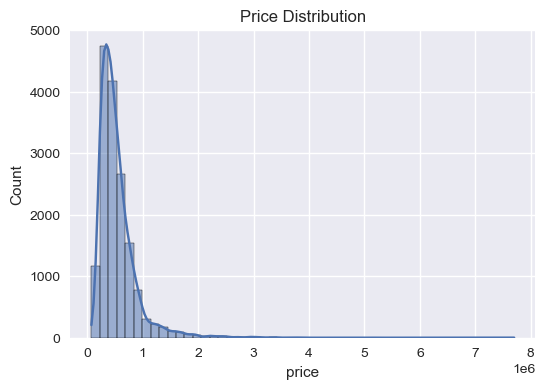

In [11]:
# Visualizing price distribution
plt.figure(figsize=(6,4))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

In [12]:
# Right-skewed distribution
# Very expensive outliers

# Housing prices are heavily right-skewed with extreme outliers. To stabilize variance and improve regression performance, 
# I plan to apply a log transformation to the target variable.

In [13]:
train_df["log_price"] = np.log1p(train_df["price"])

In [14]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,12.501142
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,12.409018
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,12.206078
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750,12.772806
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,12.354497


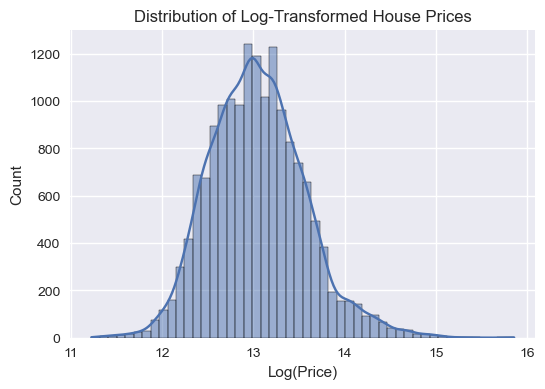

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df["log_price"], bins=50, kde=True)
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.title("Distribution of Log-Transformed House Prices")
plt.show()

In [16]:
train_df[["lat", "long"]].describe()

,lat,long
count,16209.000000,16209.000000
mean,47.560707,-122.214003
std,0.138340,0.140093
min,47.159300,-122.519000
25%,47.472500,-122.328000
50%,47.572400,-122.230000
75%,47.678200,-122.125000
max,47.777600,-121.315000


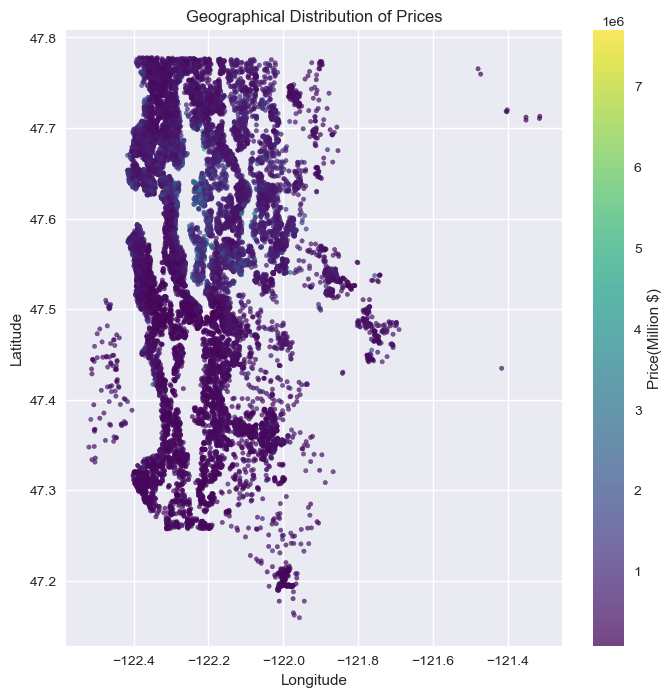

In [17]:
# Geographical distribution of prices
plt.figure(figsize=(8, 8))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=10,
    alpha=0.7,
)
plt.colorbar(label="Price(Million $)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Prices")
plt.show()

In [18]:
# Saving processed initial datasets
train_df.to_csv("../data/processed/train_initial.csv", index=False)
test_df.to_csv("../data/processed/test_initial.csv", index=False)

In [19]:
# Create price bins for balanced sampling
train_df["price_bin"] = pd.qcut(
    train_df["price"],
    q=10,
    labels=False
)

train_df["price_bin"].value_counts().sort_index()

price_bin
0    1654
1    1588
2    1623
3    1633
4    1665
5    1562
6    1628
7    1653
8    1582
9    1621
Name: count, dtype: int64

In [20]:
# Divides prices into 10 equal-frequency buckets

# price_bin = 0 → cheapest
# price_bin = 9 → most expensive

In [21]:
# Stratified sampling to create balanced subset
SAMPLES_PER_BIN = 600
RANDOM_STATE = 42

image_subset_df = (
    train_df
    .groupby("price_bin", group_keys=False)
    .apply(lambda x: x.sample(n=SAMPLES_PER_BIN, random_state=RANDOM_STATE),
           include_groups=False
           )
)

image_subset_df.shape

(6000, 22)

In [22]:
# Each price range equally represented
# No bias toward cheap or expensive areas
# Stable and reproducible sampling

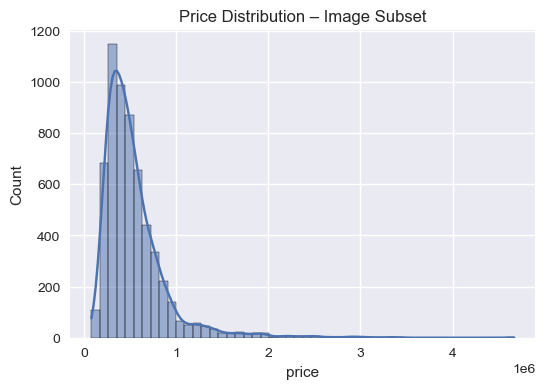

In [23]:
# Visualizing price distribution in image subset
plt.figure(figsize=(6,4))
sns.histplot(image_subset_df["price"], bins=50, kde=True)
plt.title("Price Distribution – Image Subset")
plt.show()

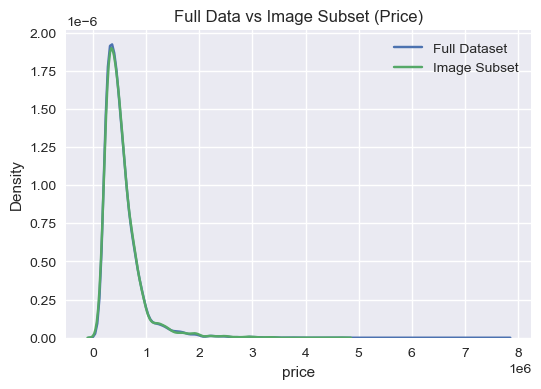

In [24]:
# Comparing full dataset and image subset price distributions
plt.figure(figsize=(6,4))
sns.kdeplot(train_df["price"], label="Full Dataset")
sns.kdeplot(image_subset_df["price"], label="Image Subset")
plt.legend()
plt.title("Full Data vs Image Subset (Price)")
plt.show()

In [25]:
# Why??

# Satellite images in this dataset are:
# From the same region
# Similar zoom level
# Many houses share very similar surroundings

# More images means:

# Larger dataset
# Longer training
# More chances of overfitting (especially with frozen CNN)

In [26]:
image_subset_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [27]:
# Saving image subset as csv
image_subset_path = "../data/processed/train_with_images.csv"

image_subset_df.to_csv(
    image_subset_path,
    index=False
)

print(f"Saved image subset to {image_subset_path}")

Saved image subset to ../data/processed/train_with_images.csv


# EDA

### Price vs Living Area

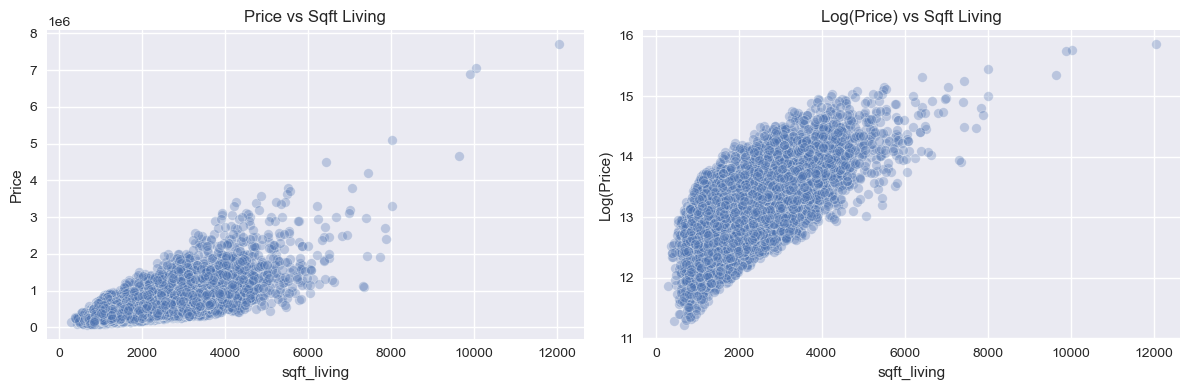

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.scatterplot(
    x=train_df["sqft_living"],
    y=train_df["price"],
    alpha=0.3,
    ax=axes[0]
)
axes[0].set_title("Price vs Sqft Living")
axes[0].set_ylabel("Price")

sns.scatterplot(
    x=train_df["sqft_living"],
    y=train_df["log_price"],
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Sqft Living")
axes[1].set_ylabel("Log(Price)")

plt.tight_layout()
plt.show()

### Price vs Waterfront

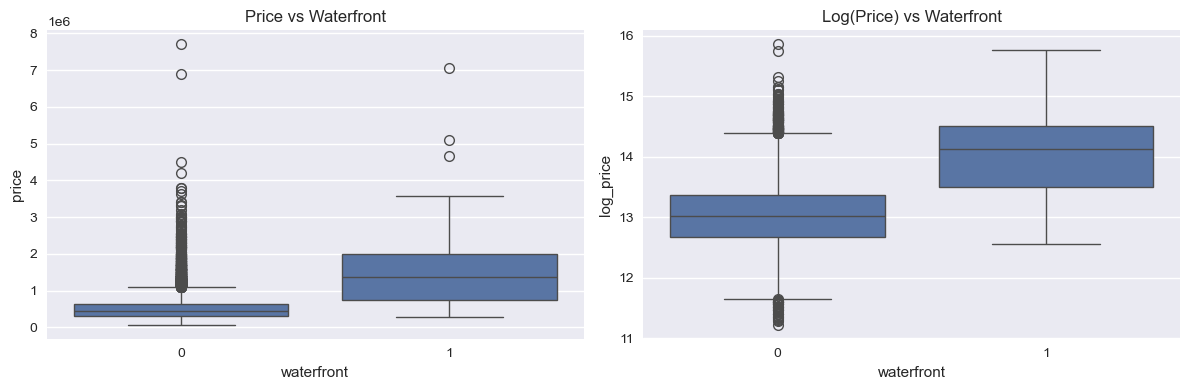

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(
    x="waterfront",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Waterfront")

sns.boxplot(
    x="waterfront",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Waterfront")

plt.tight_layout()
plt.show()

### Price vs No. of Bedrooms

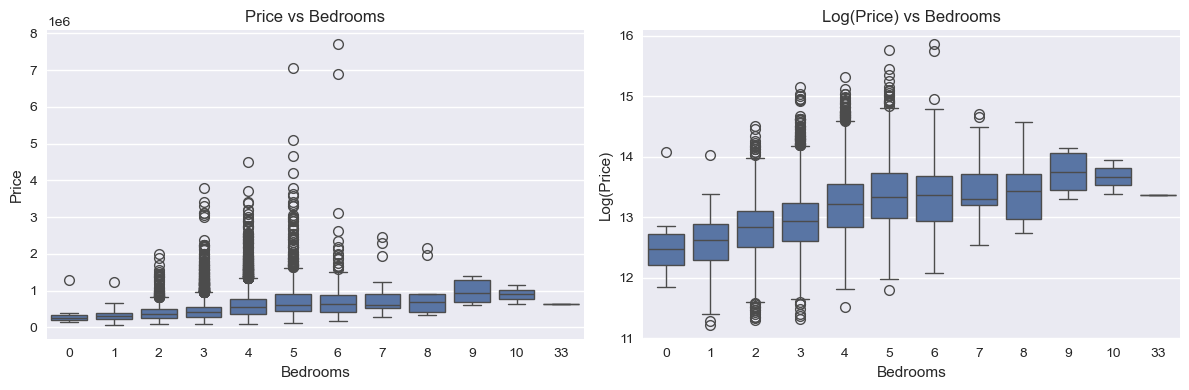

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(
    x="bedrooms",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Bedrooms")
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Price")

sns.boxplot(
    x="bedrooms",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Bedrooms")
axes[1].set_xlabel("Bedrooms")
axes[1].set_ylabel("Log(Price)")

plt.tight_layout()
plt.show()

### Price vs No. of Bathrooms

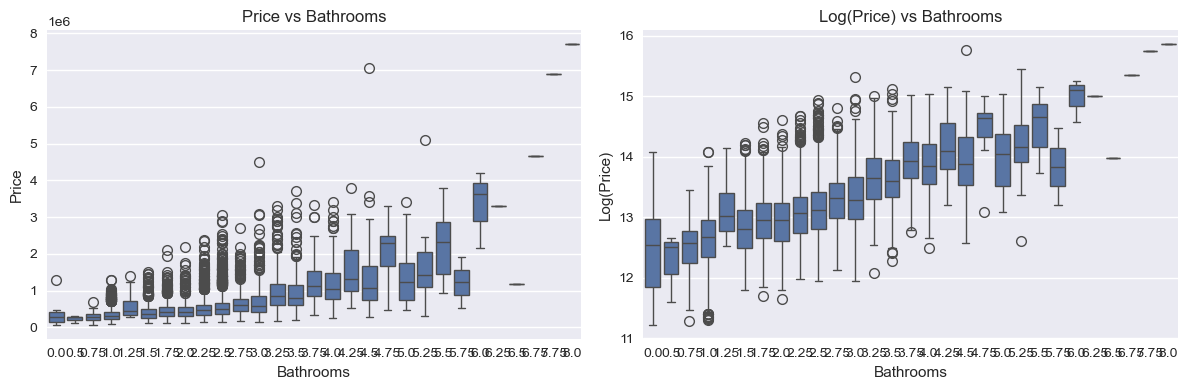

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(
    x="bathrooms",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Bathrooms")
axes[0].set_xlabel("Bathrooms")
axes[0].set_ylabel("Price")

sns.boxplot(
    x="bathrooms",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Bathrooms")
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Log(Price)")

plt.tight_layout()
plt.show()

### Price vs View Rating

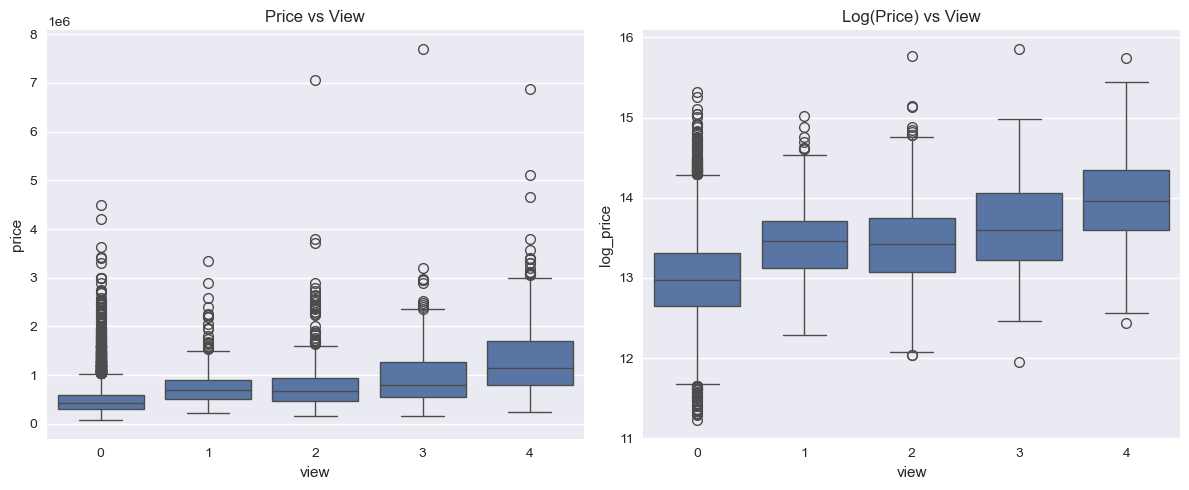

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(
    x="view",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs View")

sns.boxplot(
    x="view",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs View")

plt.tight_layout()
plt.show()

### Price vs Grade (Construction Quality)

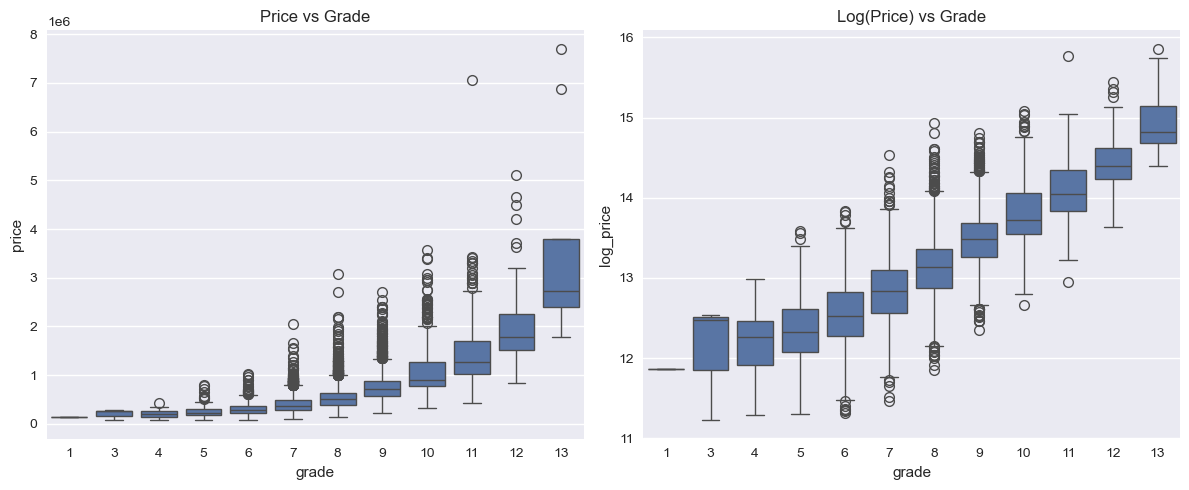

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(
    x="grade",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Grade")

sns.boxplot(
    x="grade",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Grade")

plt.tight_layout()
plt.show()

### Price vs Condition

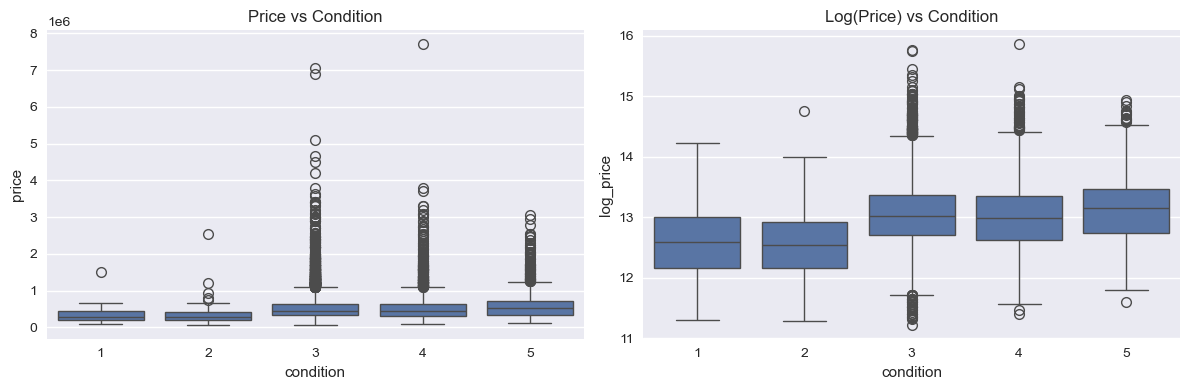

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(
    x="condition",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Condition")

sns.boxplot(
    x="condition",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Condition")

plt.tight_layout()
plt.show()

### Price vs 15 Neighbors

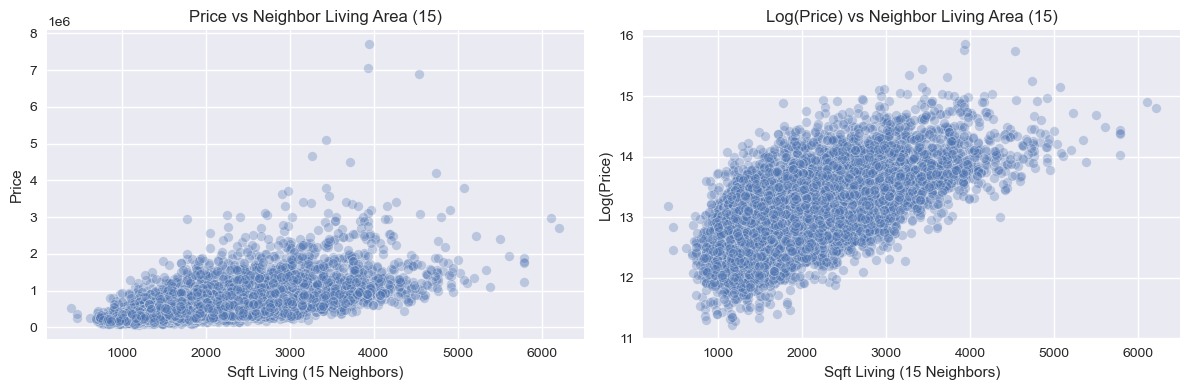

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.scatterplot(
    x=train_df["sqft_living15"],
    y=train_df["price"],
    alpha=0.3,
    ax=axes[0]
)
axes[0].set_title("Price vs Neighbor Living Area (15)")
axes[0].set_xlabel("Sqft Living (15 Neighbors)")
axes[0].set_ylabel("Price")

sns.scatterplot(
    x=train_df["sqft_living15"],
    y=train_df["log_price"],
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Neighbor Living Area (15)")
axes[1].set_xlabel("Sqft Living (15 Neighbors)")
axes[1].set_ylabel("Log(Price)")

plt.tight_layout()
plt.show()

### Price vs No. of Floors

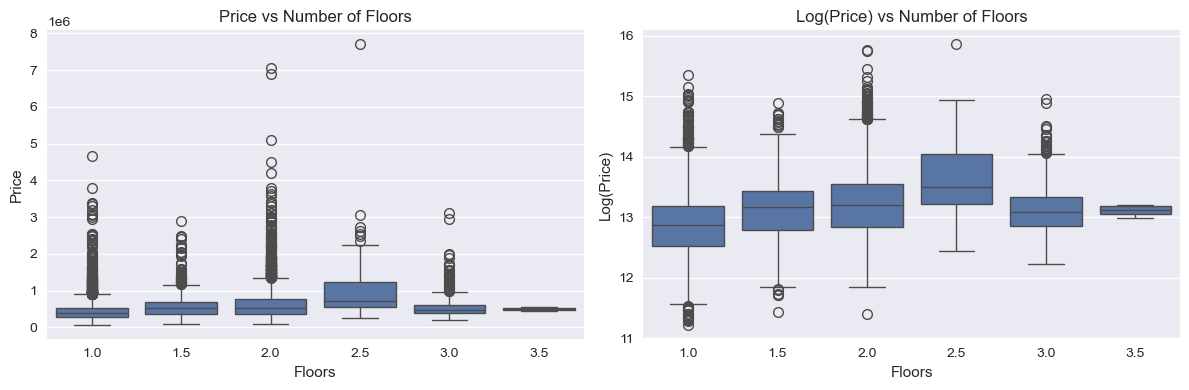

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(
    x="floors",
    y="price",
    data=train_df,
    ax=axes[0]
)
axes[0].set_title("Price vs Number of Floors")
axes[0].set_xlabel("Floors")
axes[0].set_ylabel("Price")

sns.boxplot(
    x="floors",
    y="log_price",
    data=train_df,
    ax=axes[1]
)
axes[1].set_title("Log(Price) vs Number of Floors")
axes[1].set_xlabel("Floors")
axes[1].set_ylabel("Log(Price)")

plt.tight_layout()
plt.show()

### Correlation Matrix Analysis

In [37]:
num_features = [
    "price", "log_price",
    "bedrooms", "bathrooms",
    "sqft_living", "sqft_lot",
    "floors",
    "waterfront", "view",
    "condition", "grade",
    "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated",
    "sqft_living15", "sqft_lot15",
    "lat", "long"
]

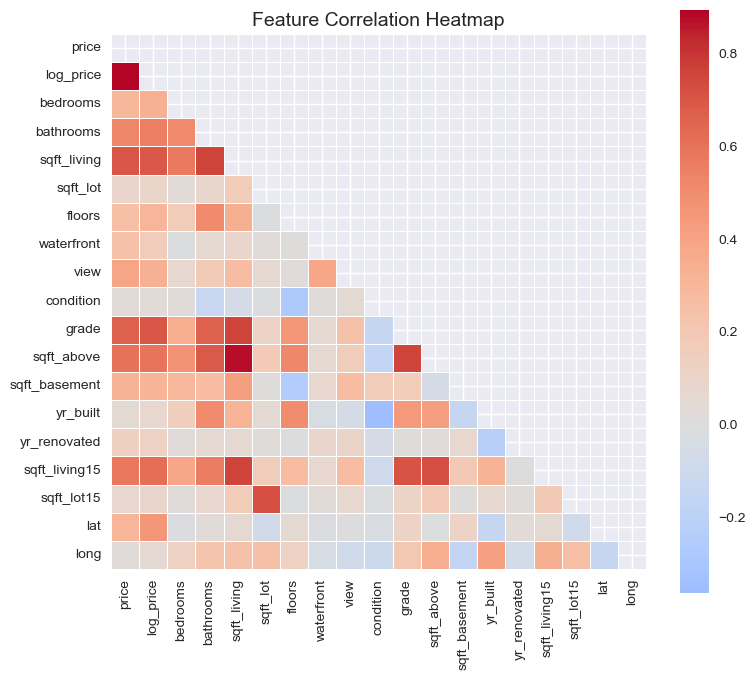

In [38]:
corr = train_df[num_features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,8))

sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

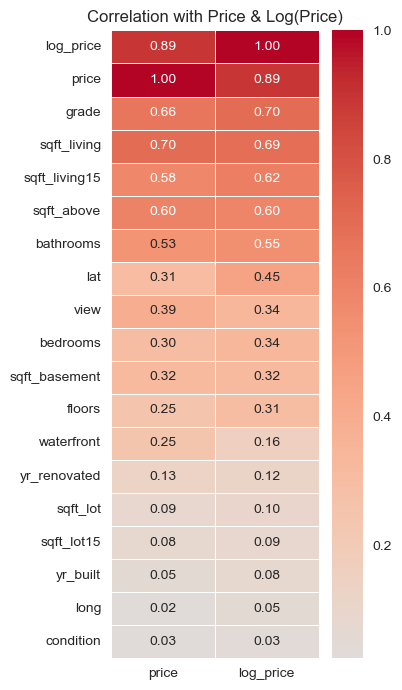

In [39]:
price_corr = corr[["price", "log_price"]].sort_values("log_price", ascending=False)

plt.figure(figsize=(4,7))

sns.heatmap(
    price_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation with Price & Log(Price)")
plt.tight_layout()
plt.show()

## Geographical Distribution of Property Prices

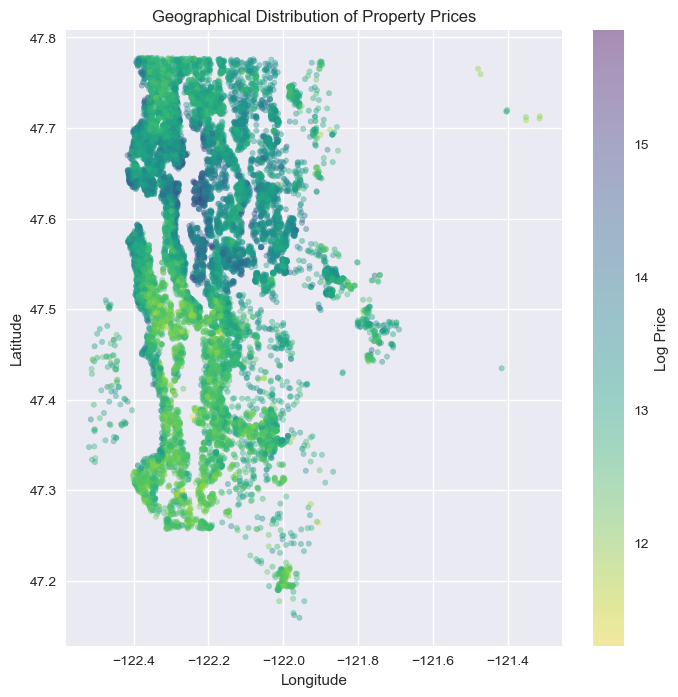

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["log_price"],
    cmap="viridis_r",
    alpha=0.4,
    s=15
)
plt.colorbar(label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Property Prices")
plt.show()

In [41]:
raw_train = pd.read_excel("/Users/apple/satellite-property-valuation/data/raw/train(1).xlsx")
raw_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [42]:
from sklearn.preprocessing import StandardScaler

# Identify columns that need scaling (Numerical but not Binary)
scale_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'sqft_living15', 'sqft_lot15', 'lat', 'long']

# Initialize Scaler
scaler = StandardScaler()

# Fit on TRAIN, Transform on TRAIN & TEST
# (Crucial: Never fit on test data, it causes data leakage)
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

print("Feature scaling complete. Mean of sqft_living should be ~0.")
print(train_df['sqft_living'].head())

Feature scaling complete. Mean of sqft_living should be ~0.
0   -0.290276
1   -0.521813
2   -0.389506
3   -0.918734
4   -0.874632
Name: sqft_living, dtype: float64


In [43]:
tabular_df = raw_train.drop(columns=["id", "date"])
tabular_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [44]:
tabular_df.to_csv(
    "../data/processed/train_tabular.csv",
    index=False
)

print("train_tabular.csv saved successfully")

train_tabular.csv saved successfully


In [45]:
import os
os.getcwd()

'/Users/apple/satellite-property-valuation/notebooks'

In [46]:
import os

os.listdir("../data/images")[:5]

['1931300175.0.png',
 '2652500070.0.png',
 '7504100110.0.png',
 '2062600020.0.png',
 '3727800065.0.png']

In [47]:
import os
import pandas as pd
from pathlib import Path

# Reload clean
image_df = pd.read_csv("../data/processed/train_with_images.csv")

# IMPORTANT: ensure id is float so '.0' exists
image_df["id"] = image_df["id"].astype(float)

IMAGE_DIR = Path("../data/images")

# Build paths that MATCH the actual filenames on disk
image_df["image_path"] = image_df["id"].apply(
    lambda x: IMAGE_DIR / f"{x}.png"
)

image_df[["id", "image_path"]].head()

,id,image_path
0,9.543000e+09,../data/images/9543000205.0.png
1,3.353400e+09,../data/images/3353400120.0.png
2,2.976801e+09,../data/images/2976800749.0.png
3,7.335400e+09,../data/images/7335400020.0.png
4,7.883601e+09,../data/images/7883600700.0.png


In [48]:
image_df["image_exists"] = image_df["image_path"].apply(lambda x: x.exists())
image_df["image_exists"].value_counts()

image_exists
True    6000
Name: count, dtype: int64

In [49]:
image_df = image_df[image_df["image_exists"]].reset_index(drop=True)
image_df.shape

(6000, 24)

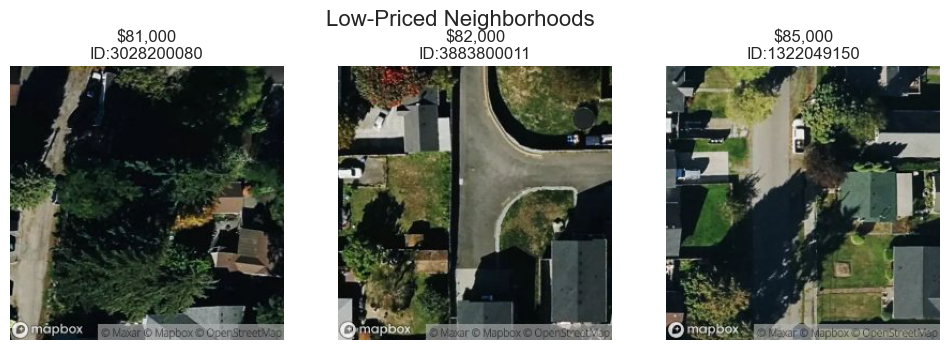

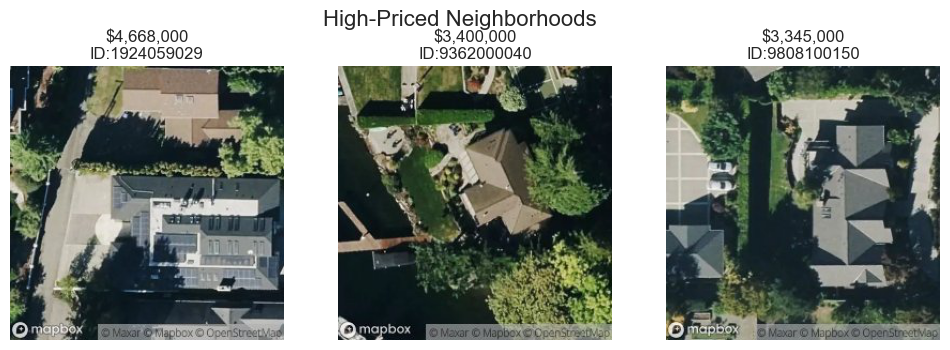

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

cheap = image_df.nsmallest(3, "price")
expensive = image_df.nlargest(3, "price")

def show_images(df, title):
    plt.figure(figsize=(12,4))
    for i, (_, row) in enumerate(df.iterrows()):
        # Handle missing images safely
        if os.path.exists(row["image_path"]):
            img = Image.open(row["image_path"]).convert("RGB")
        else:
            # Blank black image if missing
            img = Image.new("RGB", (256,256), color=(0,0,0))
        
        plt.subplot(1, len(df), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"${row['price']:,}\nID:{int(row['id'])}")
        
    plt.suptitle(title, fontsize=16)
    plt.show()

# Show cheap and expensive separately
show_images(cheap, "Low-Priced Neighborhoods")
show_images(expensive, "High-Priced Neighborhoods")

In [51]:
# Low-priced areas
#     Dense concrete
#     Narrow roads
#     Less greenery
#     Industrial patterns

# High-priced areas
#     Open layouts
#     Green cover
#     Water bodies
#     Wide roads